# Car Sales Analysis

* 1. Data Cleaning Script
Goal: Handle missing values, remove duplicates, and prepare the data for model training.

In [519]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\s.lokuhewage\\car-sales-ml-project\\cars_info.csv"
df = pd.read_csv(file_path)

# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Check for missing values
missing_values_count = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values_count)

# Display total missing values
total_missing_values = missing_values_count.sum()
print(f"\nTotal missing values in dataset: {total_missing_values}")


Number of duplicate rows: 0

Missing values per column:
ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64

Total missing values in dataset: 0


In [520]:
print(df["Price"].describe())


count     17048.000000
mean      36777.778038
std       30305.015328
min        1000.000000
25%       18800.000000
50%       29990.000000
75%       45990.000000
max      999000.000000
Name: Price, dtype: float64


In [521]:
#Identify Outliers:
#A simple way to detect extreme outliers is by using the Interquartile Range (IQR):
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 805


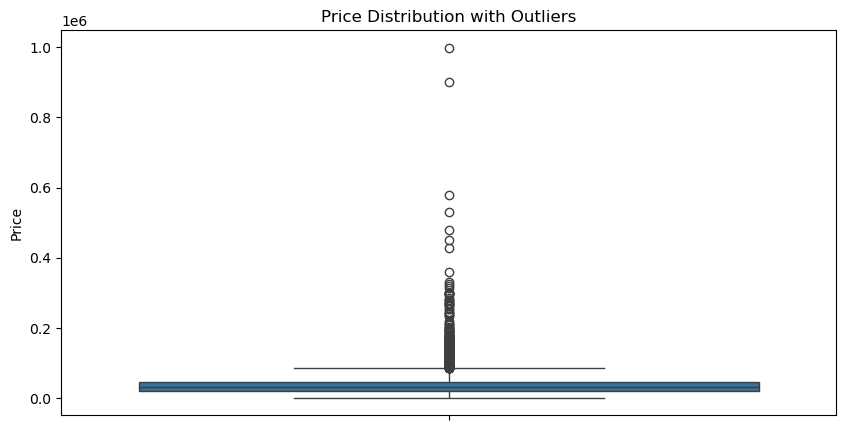

Plot saved at: C:\Users\s.lokuhewage\car-sales-ml-project\price_distribution.png


In [522]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(df["Price"])
plt.title("Price Distribution with Outliers")

# Save the plot as a PNG file
plot_path = "C:\\Users\\s.lokuhewage\\car-sales-ml-project\\price_distribution.png"
plt.savefig(plot_path)
plt.show()

print(f"Plot saved at: {plot_path}")


In [523]:
#Feature Engineering (Before Removing Outliers)

#Create new features before filtering out any data:
df["Car_Age"] = 2024 - df["Year"]
df["Kilometers_per_Year"] = df["Kilometers"] / df["Car_Age"]


In [524]:
#Remove Outliers
#remove values outside the lower_bound and upper_bound calculated using the IQR method.

df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

# Verify the new shape of the dataset
print(f"New dataset size after removing outliers: {df.shape}")




New dataset size after removing outliers: (16243, 18)


In [525]:
# Apply outlier removal 
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]


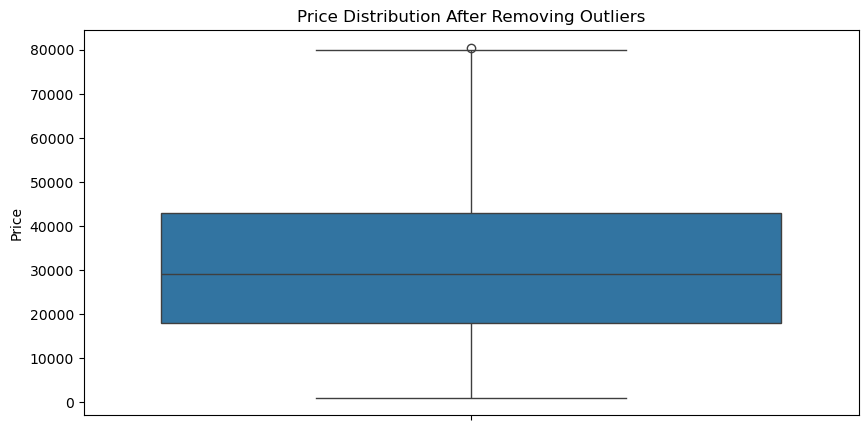

In [526]:
#Replot the Box Plot to Confirm Outliers Are Removed
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new box plot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(df["Price"])
title = "Price Distribution After Removing Outliers"
plt.title(title)

# Save the plot with the exact title as the filename
plt.savefig("Price Distribution After Removing Outliers.png")

plt.show()





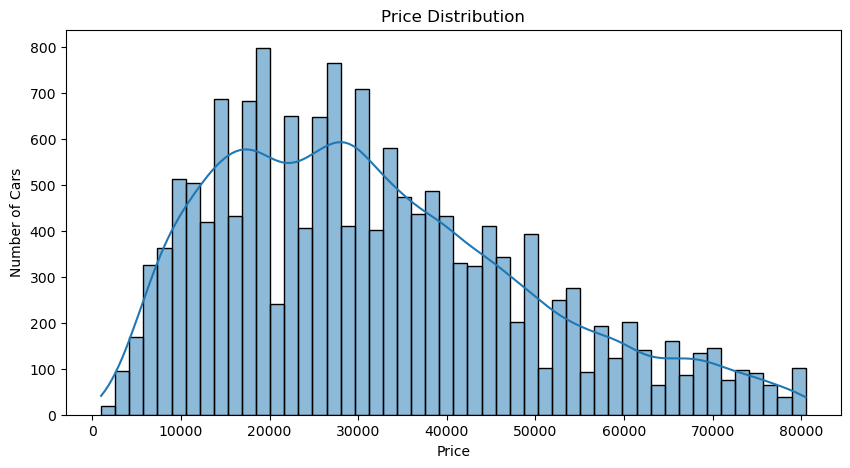

In [527]:
#Distribution of Price
#Year vs. Price (Scatter Plot)

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for Price
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=50, kde=True)
title = "Price Distribution"
plt.title(title)

# Update y-axis label
plt.ylabel("Number of Cars")  

# Save the plot
plt.savefig(f"{title}.png")

plt.show()


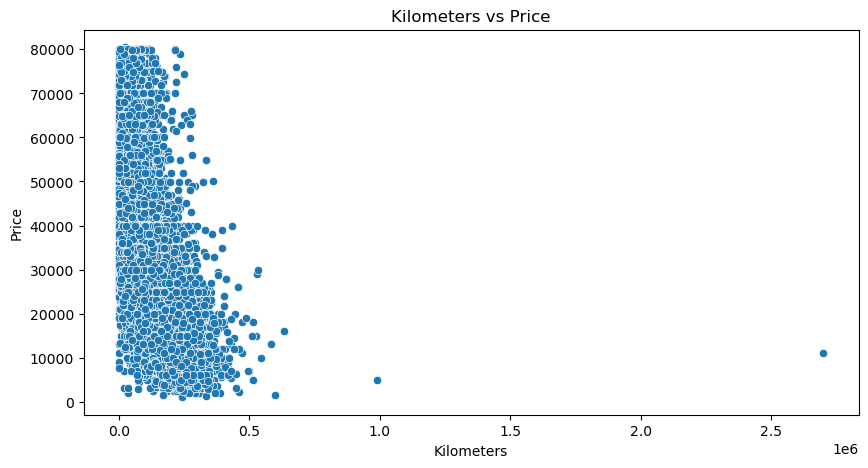

In [528]:
#Kilometers vs. Price (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Kilometers"], y=df["Price"])
title = "Kilometers vs Price"
plt.title(title)

# Save the plot
plt.savefig(f"{title}.png")

plt.show()


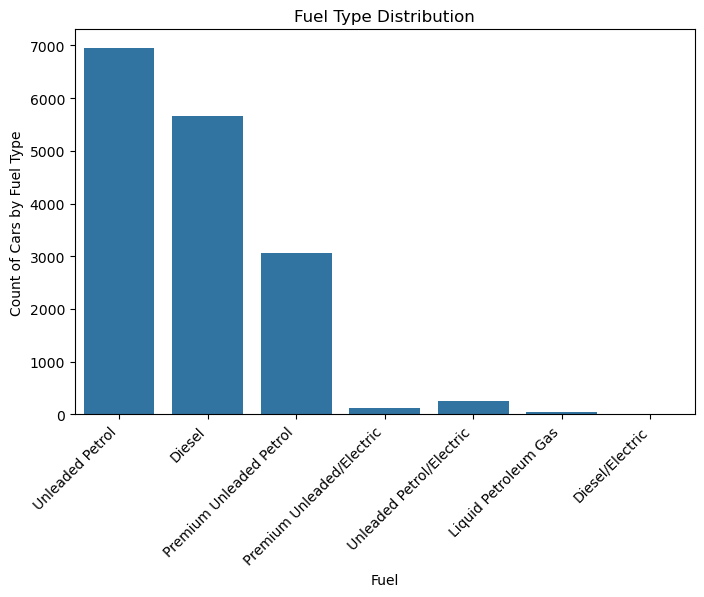

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3.1: Fuel Type Distribution (Bar Plot)
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Fuel"])

title = "Fuel Type Distribution"
plt.title(title)

# Update y-axis label
plt.ylabel("Count of Cars by Fuel Type")  

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig(f"{title}.png")

plt.show()


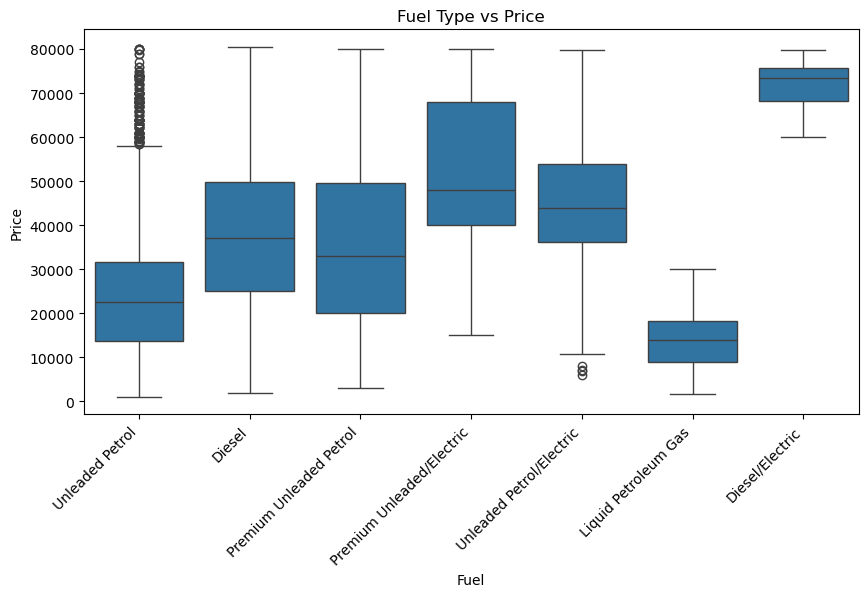

In [530]:
#Step 3.2: Fuel Type vs. Price (Box Plot)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Fuel"], y=df["Price"])
title = "Fuel Type vs Price"
plt.title(title)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot
plt.savefig(f"{title}.png")

plt.show()


In [531]:
print(df.dtypes)


ID                       int64
Name                    object
Price                    int64
Brand                   object
Model                   object
Variant                 object
Series                  object
Year                     int64
Kilometers               int64
Type                    object
Gearbox                 object
Fuel                    object
Status                  object
CC                       int64
Color                   object
Seating Capacity         int64
Car_Age                  int64
Kilometers_per_Year    float64
dtype: object


In [532]:
 #Encoding Categorical Features (Before Correlation Analysis)

#Convert categorical features to numbers:
from sklearn.preprocessing import LabelEncoder

label_cols = ["Brand", "Model", "Variant", "Series", "Type", "Gearbox", "Fuel", "Status", "Color"]
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])



In [533]:
# Check the shape of the dataset before and after feature engineering
before_features = df.shape

# Feature Engineering (if not already done)
df["Car_Age"] = 2024 - df["Year"]
df["Kilometers_per_Year"] = df["Kilometers"] / df["Car_Age"]

after_features = df.shape

if before_features == after_features:
    print("✅ No data was removed before feature engineering.")
else:
    print("❌ Data was removed before feature engineering! Recalculate outliers after feature engineering.")


✅ No data was removed before feature engineering.


In [534]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Name'], dtype='object')


In [535]:
#Drop "Name" 

df.drop(columns=["Name"], inplace=True)


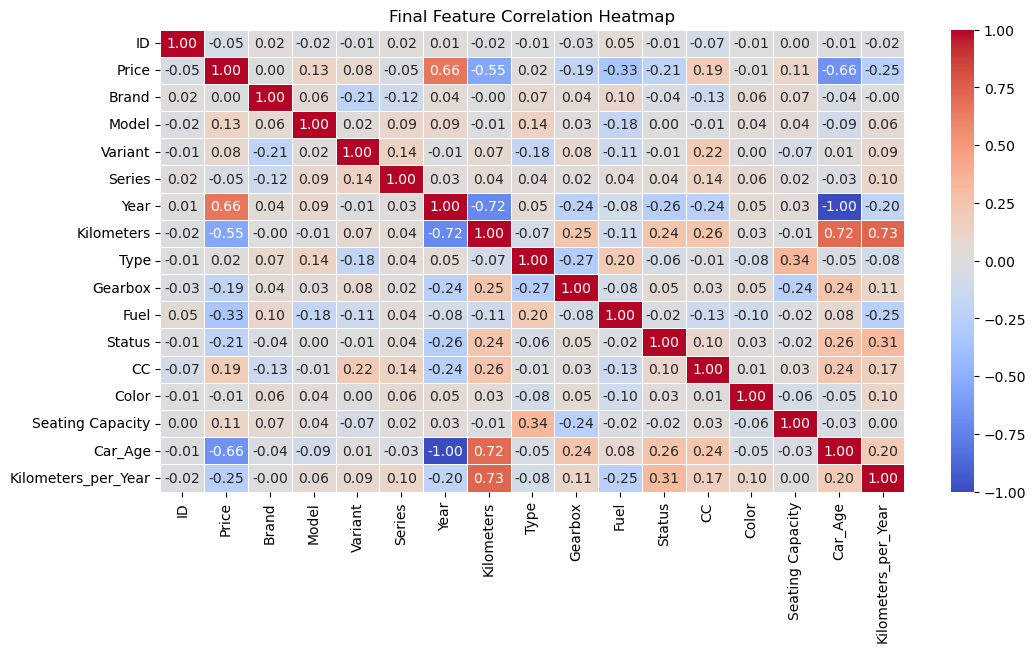

In [536]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute new correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Final Feature Correlation Heatmap")

# Save the new heatmap
plt.savefig("Final Feature Correlation Heatmap.png")
plt.show()


In [537]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ Step 1: Split Data (Before Scaling)
X = df.drop(columns=["Price"])  # Features (Excluding Target)
y = df["Price"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 2: Feature Scaling (Only on Numeric Features & After Splitting)
scaler = StandardScaler()
num_cols = ["Kilometers", "CC", "Seating Capacity", "Car_Age", "Kilometers_per_Year"]  # ✅ Remove "Price"
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])  # Fit on training data only
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Transform test data

# ✅ Step 3: Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train on training data only

# ✅ Step 4: Make Predictions
y_pred = model.predict(X_test)

# ✅ Step 5: Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"🔹 RMSE: {rmse:.2f}")
print(f"🔹 R² Score: {r2:.4f}")


📊 Model Performance:
🔹 RMSE: 5093.63
🔹 R² Score: 0.9138


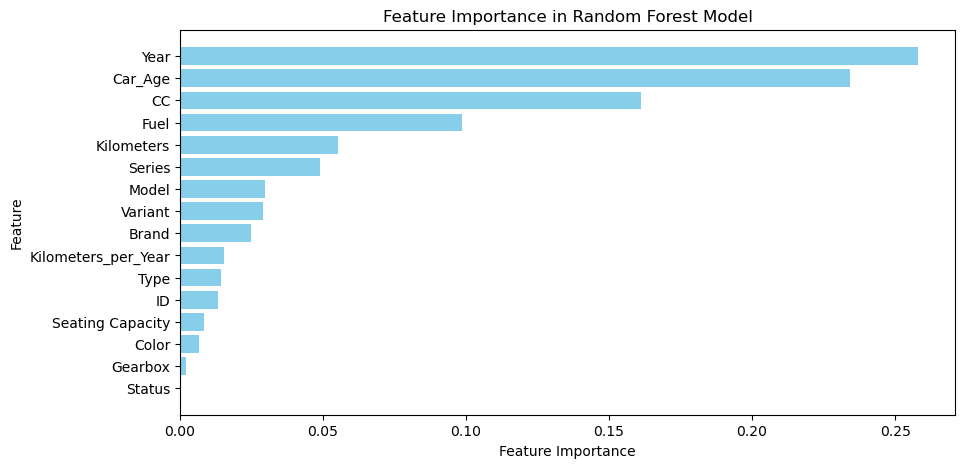

                Feature  Importance
5                  Year    0.258038
14              Car_Age    0.234224
11                   CC    0.161107
9                  Fuel    0.098618
6            Kilometers    0.055094
4                Series    0.048770
2                 Model    0.029581
3               Variant    0.029153
1                 Brand    0.024909
15  Kilometers_per_Year    0.015270
7                  Type    0.014418
0                    ID    0.013327
13     Seating Capacity    0.008510
12                Color    0.006617
8               Gearbox    0.002021
10               Status    0.000343


In [538]:
#Check Feature Importance
#Add this code to analyze which features have the biggest impact on price:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display importance
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Sort features by importance (highest to lowest)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display the top features
print(importance_df)


In [539]:
##Next Steps: Model Optimization


In [540]:
#Hyperparameter Tuning
#RandomizedSearchCV to find the best parameters for Random Forest.

#✅ Try Hyperparameter Tuning (RandomizedSearchCV)
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Randomized search
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter combinations to test
    cv=3,       # Cross-validation folds
    scoring="neg_root_mean_squared_error",
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Train with best params
best_model = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [541]:
 #Train & Evaluate the Tuned Model

# Train the model with optimized hyperparameters

best_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=20,
    random_state=42
)

best_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [542]:
#Evaluate Performance

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_optimized = best_model.predict(X_test)

# Calculate RMSE and R² Score

rmse_optimized = mean_squared_error(y_test, y_pred_optimized) ** 0.5

r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized RMSE: {rmse_optimized:.2f}")
print(f"Optimized R² Score: {r2_optimized:.4f}")


Optimized RMSE: 5068.54
Optimized R² Score: 0.9146


In [543]:

#Save the trained model using joblib:
import joblib

#Save the Model for Future Use
joblib.dump(best_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [544]:
#Test Loading & Using the Model

import joblib

# Load the saved model
loaded_model = joblib.load("random_forest_model.pkl")

# Test prediction on new data
new_data = X_test.iloc[:5]  # Take first 5 rows from test data
predictions = loaded_model.predict(new_data)

print("Predicted Prices:", predictions)


Predicted Prices: [39358.37333333 28427.9423373   6936.87384146 24016.19916667
 33729.45810224]


In [545]:
# Select the first few actual prices from the test set
actual_prices = y_test[:5].values  # Convert to NumPy array if needed

# Print a comparison table
import pandas as pd
comparison_df = pd.DataFrame({"Actual Price": actual_prices, "Predicted Price": y_pred_optimized[:5]})
print(comparison_df)


   Actual Price  Predicted Price
0         38490     39358.373333
1         28990     28427.942337
2          7490      6936.873841
3         25990     24016.199167
4         35850     33729.458102


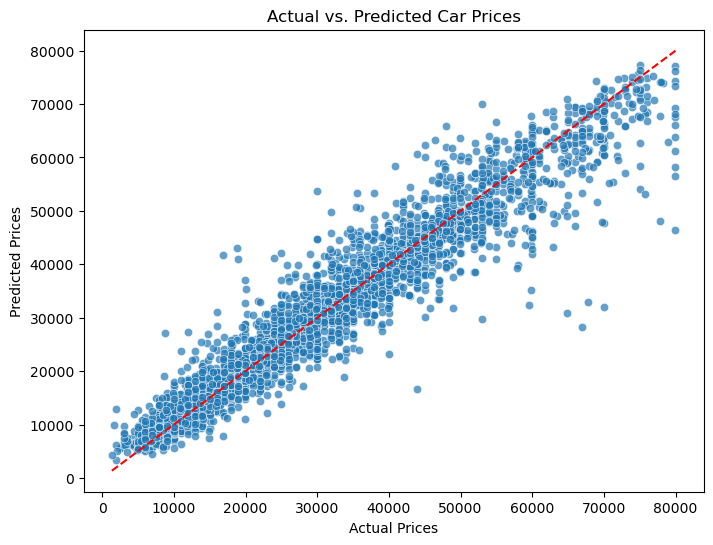

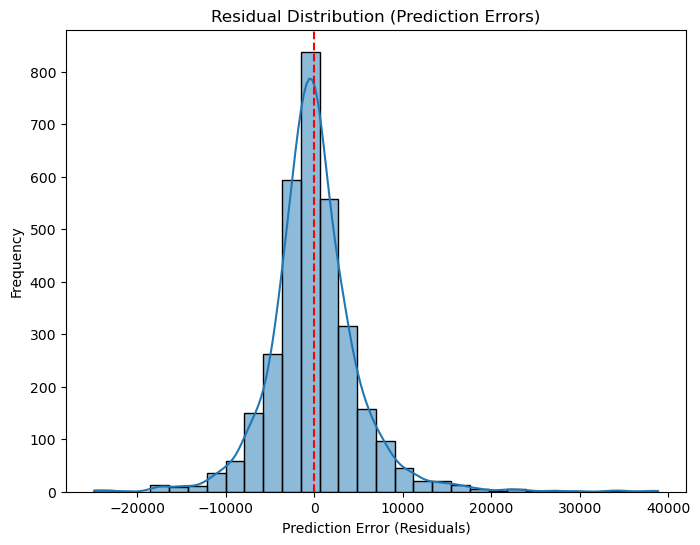

In [546]:
#Visualizing Model Performance

#✅ Scatter Plot: Compare actual vs. predicted prices. 
#✅ Residual Plot: Show the errors (differences between actual and predicted prices).

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices")
plt.savefig("actual_vs_predicted.png", dpi=300)  # Save the plot
plt.show()

# Residual Plot: Errors in Prediction
residuals = y_test - y_pred_optimized
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Prediction Errors)")
plt.savefig("residual_distribution.png", dpi=300)  # Save the plot
plt.show()
